In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [103]:
data=pd.read_excel('/kaggle/input/cocacola/CocaCola_Sales_Rawdata.xlsx', sheet_name='Sheet1')
data.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [104]:
data.shape

(42, 2)

In [105]:
data.dtypes

Quarter     object
Sales      float64
dtype: object

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [107]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot: >

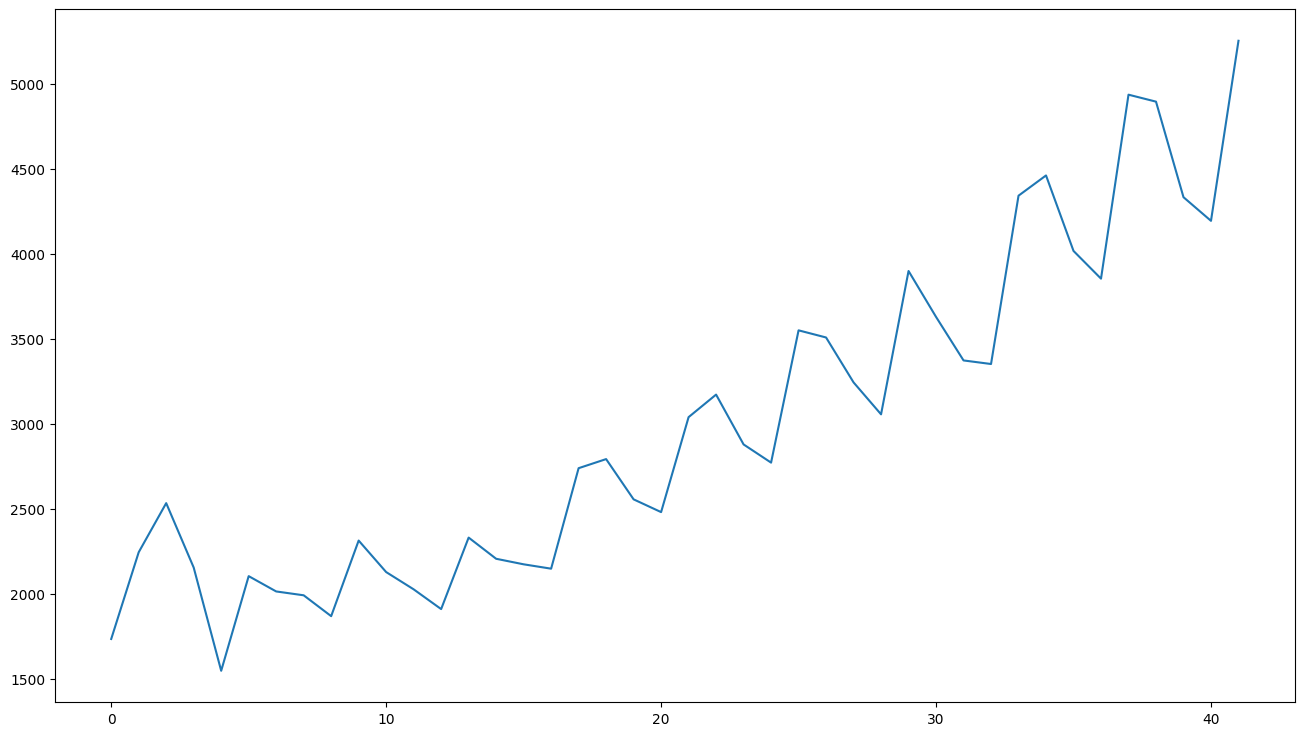

In [108]:
## visualization
plt.figure(figsize=(16, 9))
data.Sales.plot()

<AxesSubplot: ylabel='Sales'>

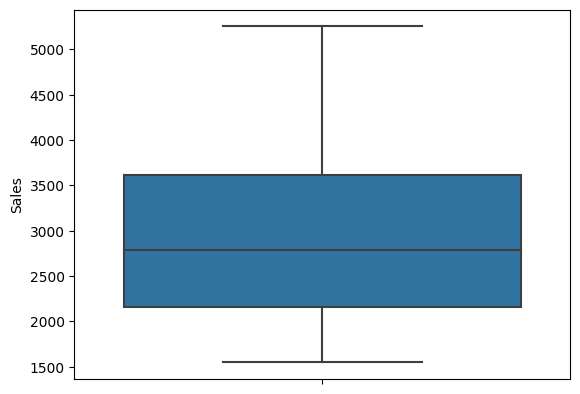

In [109]:
sns.boxplot(y="Sales",data=data)

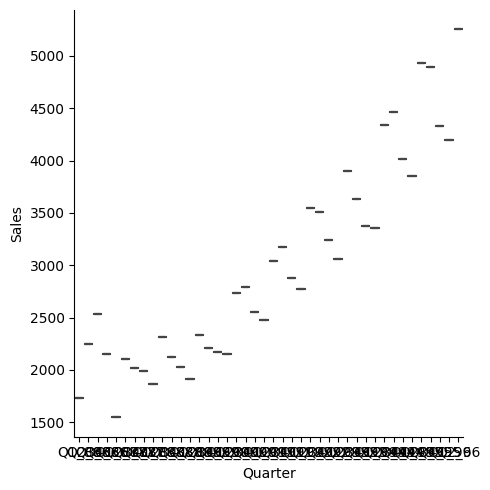

In [110]:
sns.catplot(x="Quarter",y="Sales",data=data,kind="box")

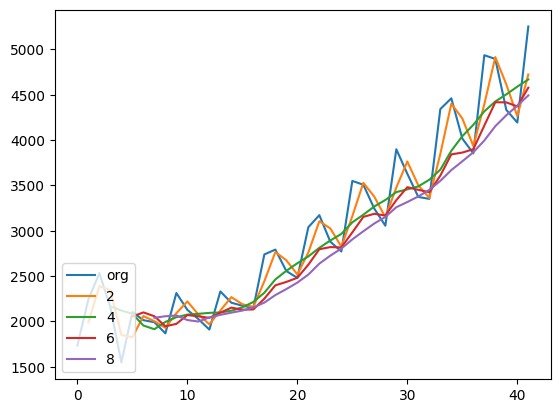

In [111]:
data.Sales.plot(label="org")
for i in range(2,10,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc=3)

<AxesSubplot: >

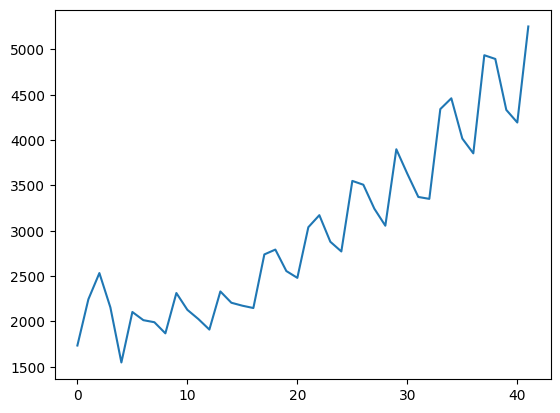

In [112]:
data.Sales.plot()

<AxesSubplot: >

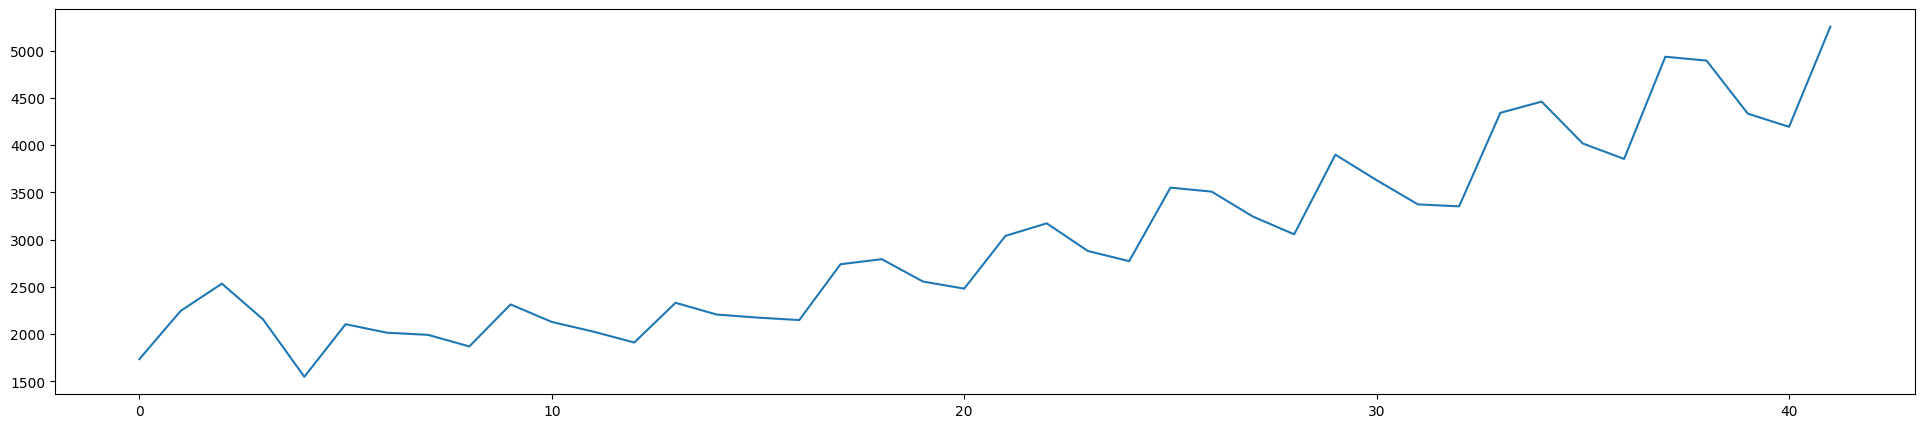

In [113]:
plt.figure(figsize=(24,5))
data.Sales.plot()

In [114]:
## preprocessing
quarter=['Q1','Q2','Q3','Q4']
n=data['Quarter'][0]
n[0:2]

'Q1'

In [115]:
data['quarter']=0
for i in range(42):
    n=data['Quarter'][i]
    data['quarter'][i]=n[0:2]
    dummy=pd.DataFrame(pd.get_dummies(data['quarter']))
    data1=pd.concat((data,dummy),axis=1)
t= np.arange(1,43)
data1['t']=t
data1['t_square']=data1['t']*data1['t']
log_Sales=np.log(data1['Sales'])
data1['log_Sales']=log_Sales

/tmp/ipykernel_34/2009669185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quarter'][i]=n[0:2]


In [116]:
data1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


<AxesSubplot: xlabel='quarter', ylabel='Sales'>

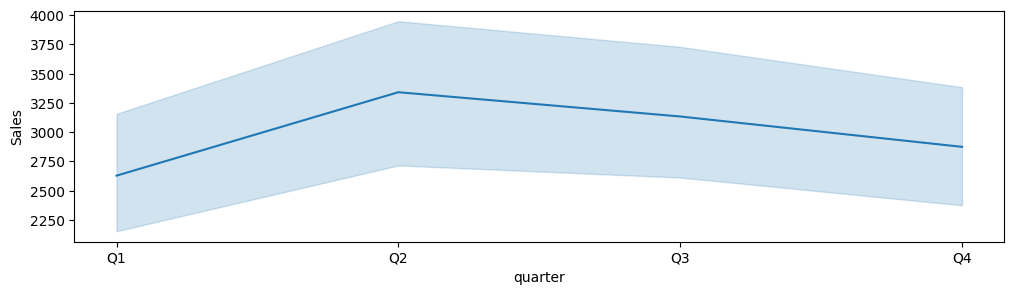

In [117]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter",y="Sales",data=data)

In [118]:
## spliting the data
Train = data1.head(34)

In [119]:
Test = data1.iloc[34:38,:]

In [120]:
predict_data=data1.tail(4)

In [121]:
data2=data1.iloc[0:38,:]

In [122]:
Train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [123]:
Test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
34,Q3_94,4461.0,Q3,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311


In [124]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [125]:
# # Build Model & Calculate RMSE Values
## linear model
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

669.4685590402657

In [126]:
## exponential
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

564.5012993862682

In [127]:
## Quadratic
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

394.67472775414996

In [128]:
## addative seasonality
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1686.7389646362883

In [129]:
## Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

174.88610047128998

In [130]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1757.7740414202278

In [131]:
## Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

404.56422621594425

In [132]:
## Compare the results 
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,174.886100
2,rmse_Quad,394.674728
6,rmse_Mult_add_sea,404.564226
1,rmse_Exp,564.501299
0,rmse_linear,669.468559
3,rmse_add_sea,1686.738965
5,rmse_Mult_sea,1757.774041


In [133]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,174.886100
2,rmse_Quad,394.674728
6,rmse_Mult_add_sea,404.564226
1,rmse_Exp,564.501299
0,rmse_linear,669.468559
3,rmse_add_sea,1686.738965
5,rmse_Mult_sea,1757.774041


In [134]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [135]:
### Build the model on entire data set
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=data2).fit()

In [136]:
pred_new  = pd.Series(add_sea_Quad.predict(predict_data))
pred_new

38    4839.220330
39    4731.881928
40    4668.345851
41    5399.952382
dtype: float64

In [137]:
predict_data["forecasted_Sales"] = pd.DataFrame(pred_new)

/tmp/ipykernel_34/3096664436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data["forecasted_Sales"] = pd.DataFrame(pred_new)


In [138]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,forecasted_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970,4839.220330
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015,4731.881928
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410,4668.345851
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555,5399.952382
